In [23]:
#comenzamos cargando bibliotecas, todas las que tenemos hasta ahora

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib.colors import ListedColormap
from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing
import statsmodels.api as sm

In [5]:
#cargar el csv de pescados

df = pd.read_csv("Fish.csv")

In [6]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


1.Crea una nueva columna que incluya el volumen de pez, asumiéndolo como un cilindro.
Para un cilindro con una base circular, el área de la base (A) es igual a πr², donde "r" es el radio de la base del cilindro, y la altura (h) es la distancia entre las dos bases circulares.

In [ ]:
"""
Considera que el pez es un cilindro por tanto el volumen de este será: Volumen = Área de la base × Altura 
Para un cilindro con una base circular, el área de la base (A) es igual a πr², donde "r" es el radio de la base del cilindro, y la altura (h) es la distancia entre las dos bases circulares.
Por lo tanto, la ecuación general para el volumen (V) de un cilindro es:
np.pi*df['Height']*(df['Width']/2)**2
"""

In [7]:
#obtenemos la formula por la que cada fila será sometida
Fish_area = np.pi*df['Height']*(df['Width']/2)**2

In [8]:
#Insertamos la columna con el lugar, el nombre y la formula que hicimos previamente.
#Ya esta insertada, asi que para evitar el error, lo dejaremos en texto
df.insert(7, "Volumen", Fish_area)

In [9]:
#Verificamos el cambio, con un head 
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Volumen
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,146.215854
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,181.707071
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,214.391723
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,198.477454
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,257.609344


In [ ]:
#AHI SIIIII, ahora podemos pasar tranquilamente a la pregunta 2

2. Veriﬁca la correlación posible entre las variables, numérica y gráﬁcamente.
¿Aumenta la correlación entre el peso y longitudes de los peces, altura y ancho al añadir el volumen? Explica.

In [10]:
#Ya, vamos a verificar con graficos, PERO, nuestro DF tiene columnas con STRINGS entonces no podremos hacer en analisis tranquilamente, entonces
##seleccionaremos solo los numeros para hacer una correlacion sin errores
only_num = df.select_dtypes(include=['number'])

<Axes: >

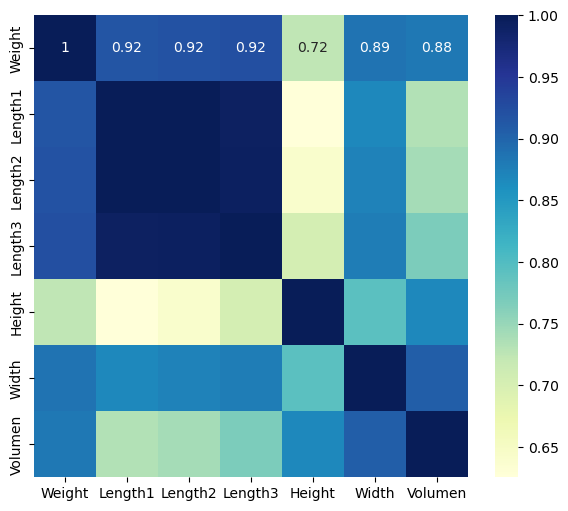

In [11]:
##Una vez ya separado el df, ahora vamos a generar una tabla que nos permita sacar conclusiones segun lo señalado:
plt.figure(figsize=(7,6))
sns.heatmap(only_num.corr(), annot=True, cmap=plt.cm.YlGnBu)

In [12]:
##y ahora numericamente
num_corr = only_num.corr()
num_corr

,Weight,Length1,Length2,Length3,Height,Width,Volumen
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507,0.881981
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050,0.732409
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547,0.741313
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520,0.767774
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881,0.868256
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000,0.905626
Volumen,0.881981,0.732409,0.741313,0.767774,0.868256,0.905626,1.000000


In [ ]:
"""
Ya, aqui se pone interesante el analisis, con la columna agregada de area, existe una relacion directa con las columnas anteriores, esto se debe a que 
la columna "VOLUMEN" es una vareable derivada de las anteriores, esto quiere decir que el volumen incluye valores de las columnas height y width (peso y altura),
por ende, el aumento de estos valores tiene total impacto en los resultados del volumen.
Lo que si nos llama la atencion es que ademas, el peso, tiene una relacion de 0.88 con el peso, esta variable no dependia de la anterior, pero si es una agradable sorpresa
al momento de generar las correlaciones.
"""

3. Construye un modelo de regresión lineal que relacione el volumen y el peso de los peces.
Realiza una breve evaluación del modelo y grafícalo.

In [13]:
# Filtrar las columnas necesarias
data1 = df[["Weight", "Volumen"]]

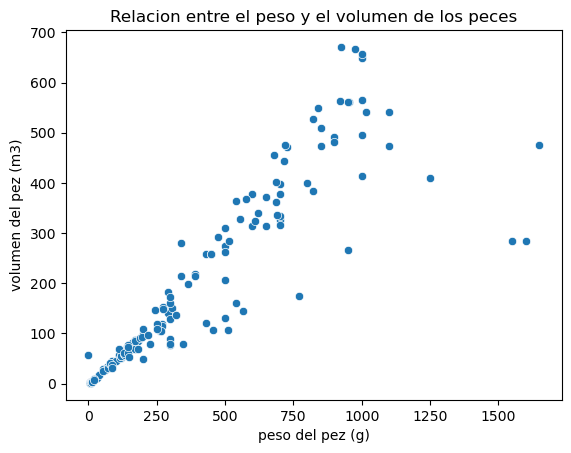

In [14]:
# Crear una gráfica de dispersión
sns.scatterplot(x="Weight", y="Volumen", data=data1)
plt.title("Relacion entre el peso y el volumen de los peces")
plt.xlabel("peso del pez (g)")
plt.ylabel("volumen del pez (m3)")
plt.show()

In [ ]:
"""
En vista preliminar, se logra ver una correlacion positiva, pero tenemos valores atipicos, creo que lo mejor es dejarlos, ya que le otorgan uniformidad
y no se ven tan dispersos como en otros casos, por lo tanto se puede generar una linea que no genera una diferencia significativa.
"""

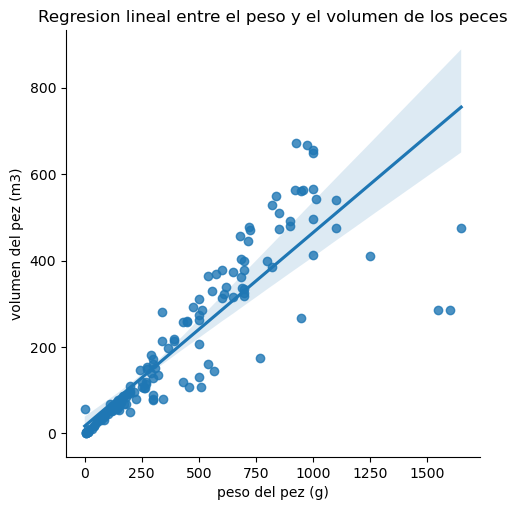

Pendiente: 0.4471677335697443
Intercepto: 17.091200005132663
Error estándar: 0.019069717474273218
Coef. de correlación: 0.8819813276865703


In [15]:
sns.lmplot(x="Weight", y="Volumen", data=data1)
plt.title("Regresion lineal entre el peso y el volumen de los peces")
plt.xlabel("peso del pez (g)")
plt.ylabel("volumen del pez (m3)")
plt.show()

# Calcular los valores de la regresión lineal. Ya veremos el significado de los parámetros
slope, intercept, r_value, p_value, std_err = stats.linregress(data1["Weight"], data1["Volumen"])

plt.show()

print(f"Pendiente: {slope}")
print(f"Intercepto: {intercept}")
print(f"Error estándar: {std_err}")
print(f"Coef. de correlación: {r_value}")

In [28]:
reg_all_data = regresion(data1, "Weight", "Volumen")
print(reg_all_data)

                            OLS Regression Results                            
Dep. Variable:                Volumen   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     549.9
Date:                Fri, 30 Aug 2024   Prob (F-statistic):           3.65e-53
Time:                        10:27:07   Log-Likelihood:                -932.49
No. Observations:                 159   AIC:                             1869.
Df Residuals:                     157   BIC:                             1875.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0912     10.198      1.676      0.0

In [59]:
"""
Aqui se pone mas entretenido el analisis, la pendiente se encuentra en el origen y con el tambien se señala una gran cantidad de peces que estan en la norma,
a medida que va aumentando el volumen del pez, el peso tambien tiene relacion directa, el error es muy cercano al 0 INCLUYENDO LOS VALORES ATIPICOS, quiere
decir que son inofensivos dentro de la muestra.
"""

'\nAqui se pone mas entretenido el analisis, la pendiente se encuentra en el origen y con el tambien se señala una gran cantidad de peces que estan en la norma,\na medida que va aumentando el volumen del pez, el peso tambien tiene relacion directa, el error es muy cercano al 0 INCLUYENDO LOS VALORES ATIPICOS, quiere\ndecir que son inofensivos dentro de la muestra.\n'

4. ¿Qué sucede si aplicas el modelo anterior por separado a cada especie de peces?
Explica. 

In [ ]:
"""
ESTA ES MI DEDUCCION DESDE ANTES DE PREGUNTARLE SOBRE QUE HACER PARA DESARROLLAR ESTA PREGUNTA, vale decir que es una hipotesis de lo que podemos encontrar

Si el modelo se aplicara a cada una da las especies:
Primero, contariamos con bases de datos bastante mas pequeñas, ya que se logra ver que hay algunos que no son mas de 20 casos.
Segundo, se puede ver en que porcentaje del grafico anterior de concentran la mayor cantidad segun sus especies.
Tercero, gracias a ello, tambien lograriamos desprender las especies atipicas, que en la vista general solo nos entregan casos, pero no se sabe de que
especie es cada uno.

"""

In [44]:
#vamos a separar cada una de las especies
species_types = df['Species'].unique()

In [45]:
#ahora vamos a separar cada una de las especies en un diccionario para poder posteriormente transformarlas en DF
species_dict = {species: df[df['Species'] == species] for species in species_types}

In [ ]:
# ahora que esta separado, crearemos df para cada una de las especies para una posterior revision.
df_species_bream = species_dict['Bream']
df_species_roach = species_dict['Roach']
df_species_whitefish = species_dict['Whitefish']
df_species_parkki = species_dict['Parkki']
df_species_perch = species_dict['Perch']
df_species_pike = species_dict['Pike']
df_species_smelt = species_dict['Smelt']

In [46]:
#Considerando que es una respuesta engorrosa y extensa, lo mejor es crear una formula que al ingresar los datos nos entrega lo solicitado, esto acelera el proceso de analisis
def plot_scatter(data, x_col, y_col, title="Relación entre el peso y el volumen de los peces", xlabel="peso del pez (g)",
ylabel="volumen del pez (m3)"):
    """
    Parametros:
    data (pd.DataFrame): The DataFrame containing the data to plot.
    x_col (str): The name of the column to be used for the x-axis.
    y_col (str): The name of the column to be used for the y-axis.
    title (str): The title of the plot.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    """
    # Crear el grafico
    sns.scatterplot(x=x_col, y=y_col, data=data)
    
    # Con los titulos y etiquetas
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Mostrar el grafico
    plt.show()


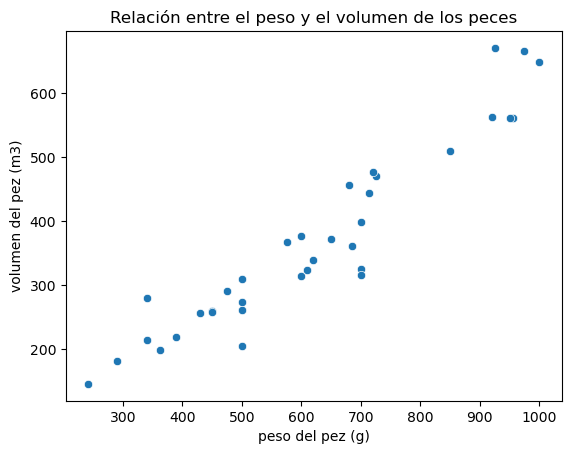

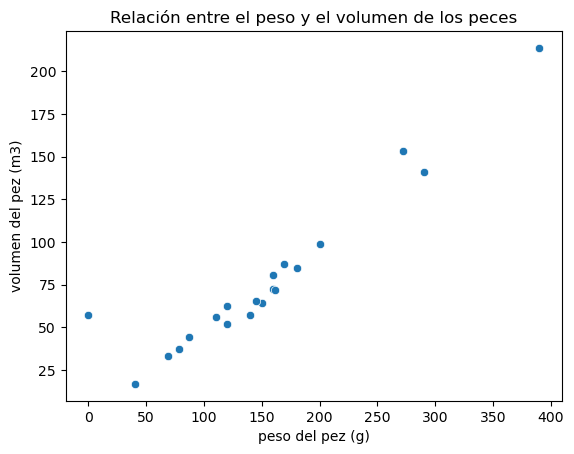

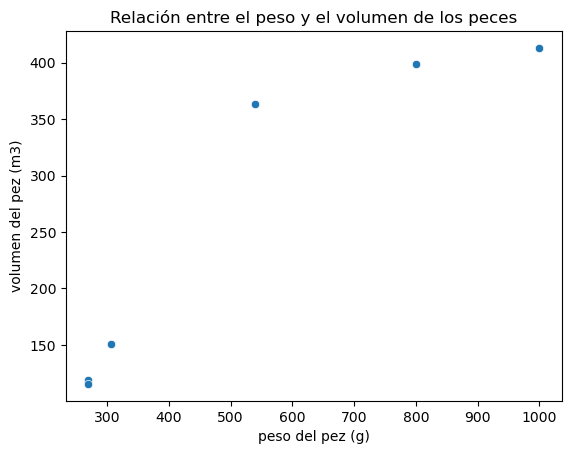

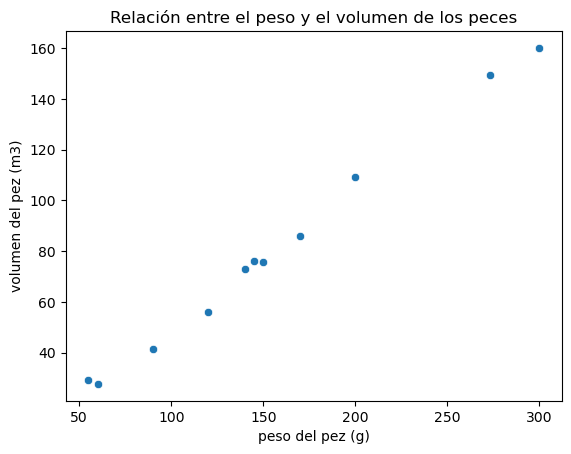

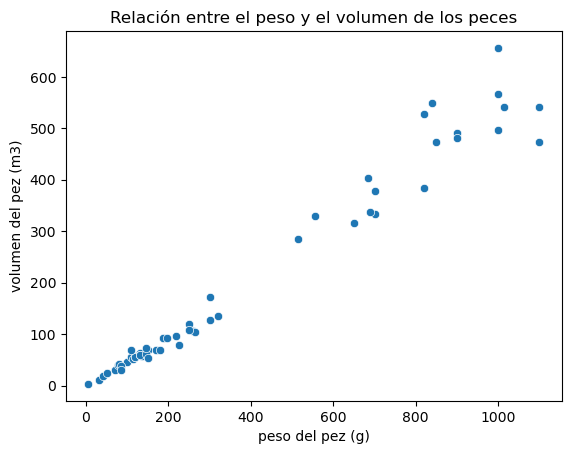

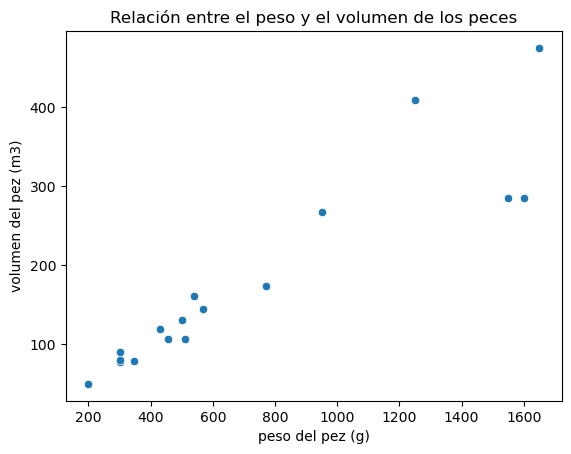

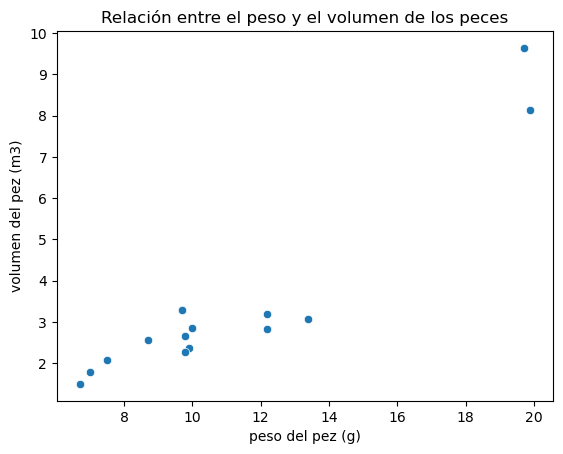

In [47]:
#Ingresamos al codigo todas la especies, de ahi se desprende lo de la hipotesis, se puede ver donde se concentra cada una de las especies
#se puede obtener informacion adicional, donde de estas se puede extraer casos atipicos
plot_scatter(df_species_bream, "Weight", "Volumen"),
plot_scatter(df_species_roach, "Weight", "Volumen"),
plot_scatter(df_species_whitefish, "Weight", "Volumen"),
plot_scatter(df_species_parkki, "Weight", "Volumen"),
plot_scatter(df_species_perch, "Weight", "Volumen"),
plot_scatter(df_species_pike, "Weight", "Volumen"),
plot_scatter(df_species_smelt, "Weight", "Volumen")

In [49]:
"""
Aqui pido disculpas por compartir la formula con los demas, se que fue mi error, no fue con la intencion de que todos se copiaran, quiero creer que cada
persona obtiene sus propios codigos y lo hace distinto por su parte, o que despues de fallar muchas veces llega a utilizar este codigo, de todas maneras
espero no lo castiguen o que se me aplique la sancion correspondiente.
"""
def regresion(dataframe, variables_independientes, variable_dependiente):
    X = dataframe[variables_independientes]
    y = dataframe[variable_dependiente]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return print(model.summary())

In [48]:
#Este codigo nos permite acelerar el proceso, al igual que la manera del grafico
regresion(df_species_bream, "Weight", "Volumen"),
regresion(df_species_roach, "Weight", "Volumen"),
regresion(df_species_whitefish, "Weight", "Volumen"),
regresion(df_species_parkki, "Weight", "Volumen"),
regresion(df_species_perch, "Weight", "Volumen"),
regresion(df_species_pike, "Weight", "Volumen"),
regresion(df_species_smelt, "Weight", "Volumen")


                            OLS Regression Results                            
Dep. Variable:                Volumen   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     289.7
Date:                Fri, 30 Aug 2024   Prob (F-statistic):           6.65e-18
Time:                        10:53:42   Log-Likelihood:                -183.02
No. Observations:                  35   AIC:                             370.0
Df Residuals:                      33   BIC:                             373.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -32.5269     24.832     -1.310      0.1

C:\Users\jeannette carreno\AppData\Local\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\jeannette carreno\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\jeannette carreno\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\jeannette carreno\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
"""
ya con las pruebas, las graficas y los datos obtenidos, la hipotesis de el inicio de la pregunta se acercan bastante a los resultados, lo bueno es que 
se obtiene tambien que especie de pez tiene peculiaridades y como estas se adaptan al grafico total de la pregunta 3, se desprende de uno de ellos que
hay especies grandes y pesadas, como tambien otras que son pequeñas y regulares.

"""

5. Construye un modelo de regresión que relacione dos o más variables con el peso de los peces. 
Realiza una breve evaluación del modelo.

In [ ]:
"""
Para entender esta situacion, debemos saber que es una variable dependiente (la que queremos averiguar cual es, la mayor parte del tiempo es representada
en un grafico con la parte Y de la ecuacion.
Las variables independientes, son las que aplicaremos para obtener el valor dependiente que estamos buscando(vale decir, que representan el valor X en la
ecuacion)
Una vez dicho esto, ahora podemos crear un modelo de regresion que nos permita encontrar el valor.
"""

In [53]:
#La pregunta en si, solicita que la variable de "Peso" o "Weight" sea la variable Y en la formula, esto quiere decir:

# Definir las variables independientes (con una constante para el término de intersección)
X = df[['Volumen', 'Height']]
X = sm.add_constant(X)  # Agregar una constante al modelo

# Definir la variable dependiente
y = df['Weight']

# Construir el modelo de regresión OLS
model = sm.OLS(y, X).fit()

# Obtener el resumen del modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     284.6
Date:                Fri, 30 Aug 2024   Prob (F-statistic):           8.93e-53
Time:                        12:10:27   Log-Likelihood:                -1038.0
No. Observations:                 159   AIC:                             2082.
Df Residuals:                     156   BIC:                             2091.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        128.6035     36.671      3.507      0.0

In [ ]:
"""
De aqui se obtiene lo siguiente, nuestro R cuadrado (r2) para la evaluacion es de un 0,785, esto quiere decir que estan muy relacionadas las variables independientes
para obtener resultados a nuestro peso, vale decir, que si queremos estimar un resultado de un peso de un pez, un 78,5% muestra que estará bastante cerca de estas conclusiones.
El peso en el cual coinciden ambas variables, es en los 128 gramos.
El volumen indica que por cada unidad adicional, el volumen aumenta en un 2.02 m3
y la altura disminuye en un -14mm por cada unidad de aumento.
"""

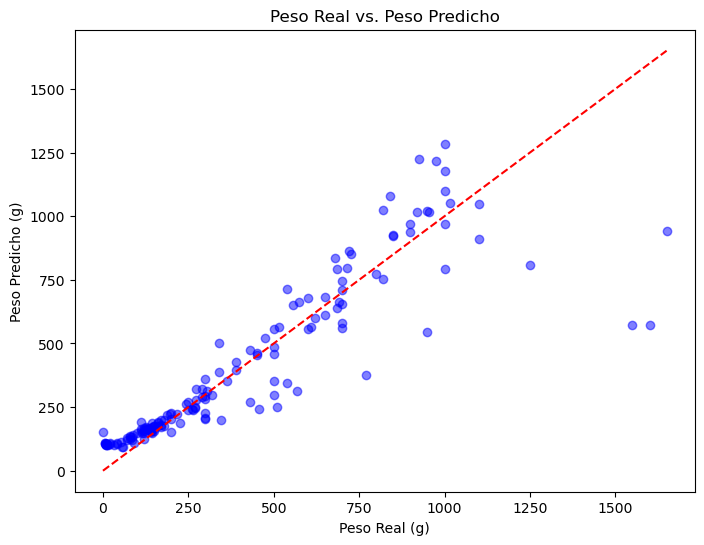

In [52]:
##En caso de que queramos compararlos por medio de un grafico, la linea roja señala la regresion predicha, y los puntos azules nos muestran el peso real
# Para obtener las predicciones del modelo
df['predicted_weight'] = model.predict(X)

# Graficar valores reales frente a predicciones
plt.figure(figsize=(8, 6))
plt.scatter(df['Weight'], df['predicted_weight'], color='blue', alpha=0.5)
plt.xlabel('Peso Real (g)')
plt.ylabel('Peso Predicho (g)')
plt.title('Peso Real vs. Peso Predicho')
plt.plot([df['Weight'].min(), df['Weight'].max()], [df['Weight'].min(), df['Weight'].max()], color='red', linestyle='--')
plt.show()

In [ ]:
"""
Espero haber cumplido con lo solicitado, mil disculpas por la filtracion que hice, insisto que no fue con la intencion de ahorrarme el tiempo o
contarles a mis compañeros, era con la intencion de compartir como solucionar la pregunta.
"""